In [1]:
import numpy as np
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [2]:
# 插值
data=np.loadtxt('./transfer-function.txt',skiprows=1)
data_lgk=np.log10(data[:,0])
data_lgTk=np.log10(data[:,1])
lgTk_interp=interp1d(data_lgk,data_lgTk,kind='cubic')
def Tk(k):
    return 10 ** lgTk_interp(np.log10(k))[()]

k=1e-3
a=Tk(k)
print('k=',k,'Tk=',a)

k= 0.001 Tk= 0.984495401382446


In [3]:
A_s=1
h=0.6774
R=8*h**(-1)
n_s=0.96

In [4]:
#窗函数
def W(k,R):
    return (3*(np.sin(k*R)-(k*R)*np.cos(k*R)))/(k*R)**3

In [5]:
def P_CDM(k):
    return A_s*k**n_s*Tk(k)**2

In [6]:
#积分
def sigma_noint(k):
    return (np.pi * k**2)/((2*np.pi)**3)*P_CDM(k)*W(k,R)**2

In [7]:
sigma2,err=quad(sigma_noint,1e-5,1e5,epsrel=1e-3)
print(sigma2)

3.3003263920574547e-18


In [8]:
A_s=(0.82)**2/sigma2
print(A_s)

2.0373742476446986e+17


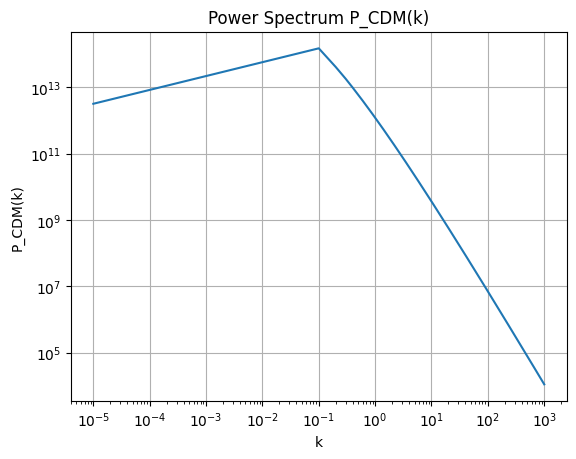

In [9]:
import matplotlib.pyplot as plt
k_min = 1e-5  # 最小 k 值
k_max = 1e3  # 最大 k 值
num_points = 10000  # 点的数量

k_values = np.linspace(k_min, k_max, num_points)
P_values = P_CDM(k_values)

plt.plot(k_values, P_values)
plt.xscale('log')  # 应用对数刻度于 x 轴
plt.yscale('log')  # 应用对数刻度于 y 轴
plt.xlabel('k')
plt.ylabel('P_CDM(k)')
plt.title('Power Spectrum P_CDM(k)')
plt.grid(True)

plt.show()


k= 0.001 Tk= 0.984495401382446
3.3003263920574547e-18
2.0373742476446986e+17


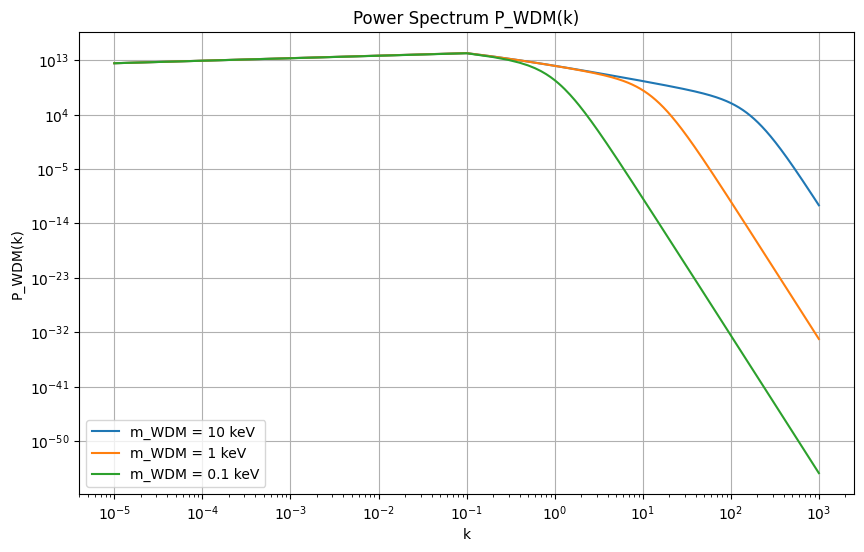

In [10]:
# 插值
data = np.loadtxt('./transfer-function.txt', skiprows=1)
data_lgk = np.log10(data[:, 0])
data_lgTk = np.log10(data[:, 1])
lgTk_interp = interp1d(data_lgk, data_lgTk, kind='cubic')

def Tk(k):
    return 10 ** lgTk_interp(np.log10(k))[()]

k = 1e-3
a = Tk(k)
print('k=', k, 'Tk=', a)

A_s = 1
h = 0.6774
R = 8 * h ** (-1)
n_s = 0.96
Omega_WDM=Omega_m=0.32


# 窗函数
def W(k, R):
    return (3 * (np.sin(k * R) - (k * R) * np.cos(k * R))) / (k * R) ** 3

def P_CDM(k):
    return A_s * k ** n_s * Tk(k) ** 2

# 积分
def sigma_noint(k):
    return (np.pi * k ** 2) / ((2 * np.pi) ** 3) * P_CDM(k) * W(k, R) ** 2

sigma2, err = quad(sigma_noint, 1e-5, 1e5, epsrel=1e-3)
print(sigma2)
A_s = (0.82) ** 2 / sigma2
print(A_s)

# 温暗物质
def P_WDM(k, m_WDM):
    alpha = 0.049 * (m_WDM) ** (-1.11) * (Omega_WDM / 0.25) ** 0.15 * (h / 0.7) ** 1.22 * h ** (-1)
    T_WDM = (1 + ((alpha * k) ** (2 * 1.12))) ** (-5 / 1.12)
    return P_CDM(k) * T_WDM ** 2

# 绘图
fig, ax = plt.subplots(figsize=(10, 6))

m_WDM_list = [10, 1, 0.1]
for m_WDM in m_WDM_list:
    k_min = 1e-5
    k_max = 1e3
    num_points = 10000

    k_values = np.linspace(k_min, k_max, num_points)
    P_values = P_WDM(k_values, m_WDM)

    ax.plot(k_values, P_values, label=f"m_WDM = {m_WDM} keV")

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P_WDM(k)')
ax.set_title('Power Spectrum P_WDM(k)')
ax.grid(True)
ax.legend()

plt.show()